In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.drop(['car_ID'],axis=1,inplace=True)

<Axes: >

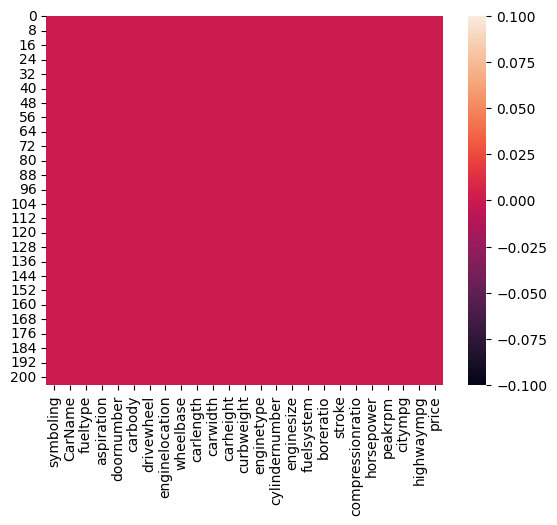

In [ ]:
#checking if we have any empty data
sns.heatmap(df.isnull())

<ipython-input-6-4eb198e91cae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth=2)


<Axes: >

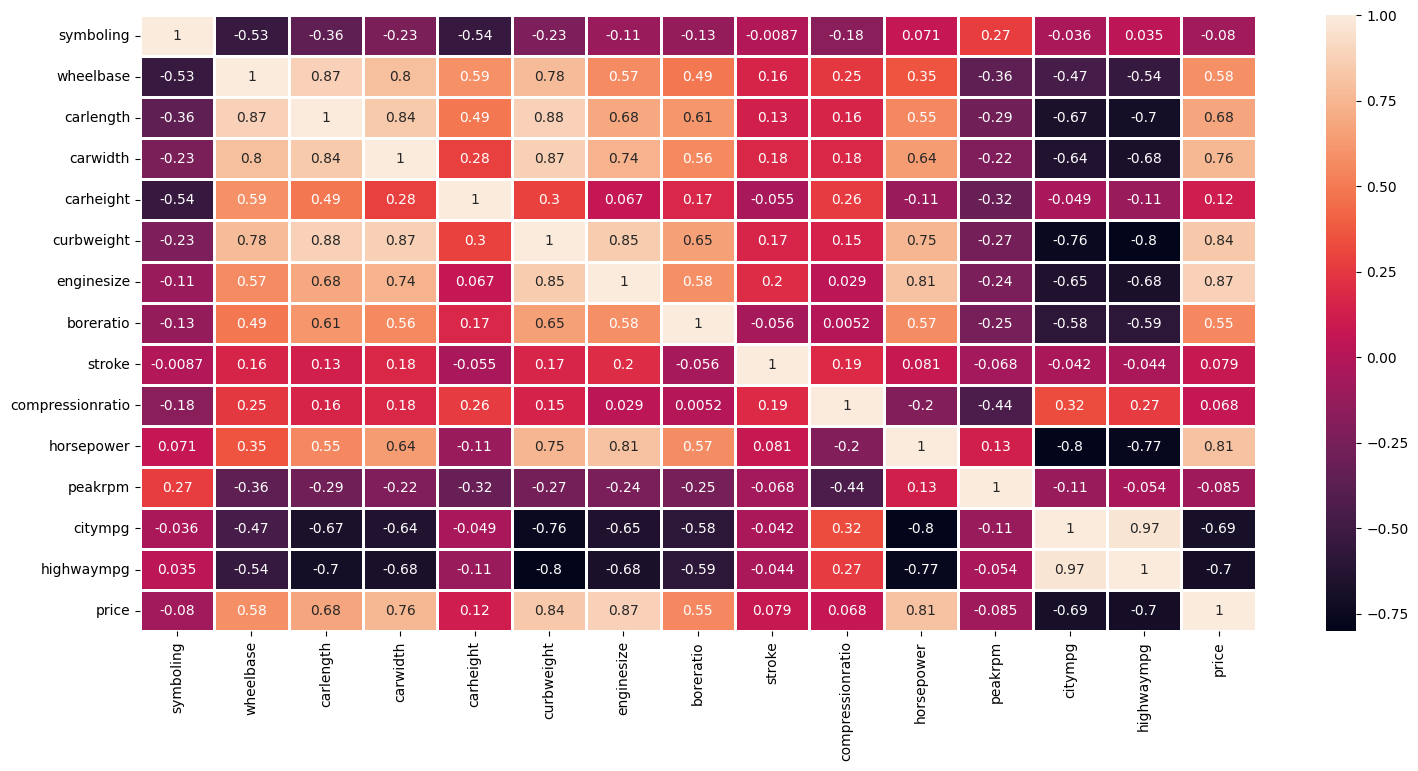

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth=2)

In [ ]:
#it seems like features like peakrpm,compressionratio,stroke are not much related to price of car so it is better to delete them
df.drop(['stroke','peakrpm','compressionratio','CarName'],axis=1,inplace=True)

<Axes: xlabel='fueltype', ylabel='price'>

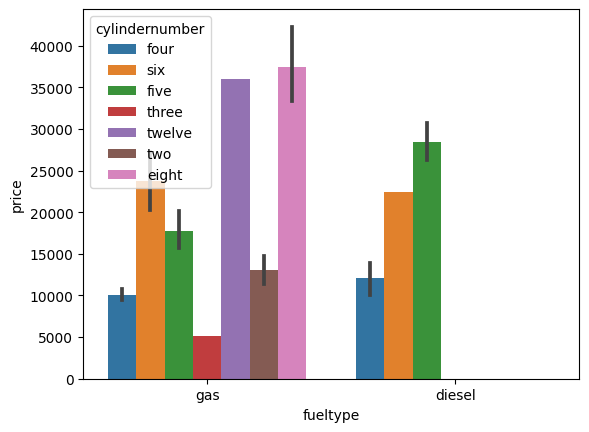

In [ ]:
sns.barplot(data=df,x='fueltype',y='price',hue='cylindernumber')

In [ ]:
#above diagram shows the car which has 8 cylinder and uses gas as fuel has the maximum price

<Axes: xlabel='fuelsystem', ylabel='highwaympg'>

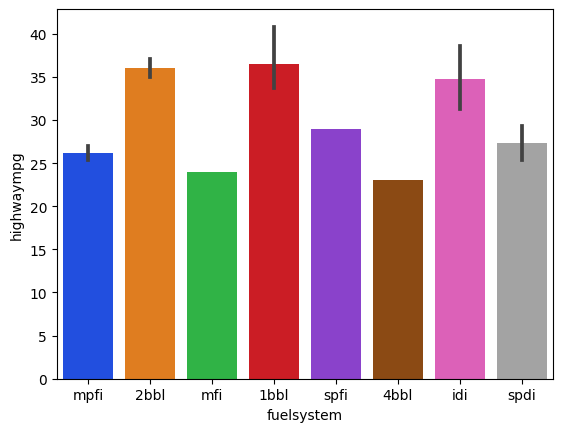

In [ ]:
sns.barplot(data=df,x='fuelsystem',y='highwaympg',estimator=np.mean,palette='bright')

In [ ]:
labelEncoder=LabelEncoder()

In [ ]:
#converting string values of each features into numeric format
features=[i for i in df.columns]
features.pop()
x=df[features]
for col in x.columns:
  if x[col].dtype=='object':
    x[col]=labelEncoder.fit_transform(x[col])

<ipython-input-12-959ac15dea18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=labelEncoder.fit_transform(x[col])
<ipython-input-12-959ac15dea18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=labelEncoder.fit_transform(x[col])
<ipython-input-12-959ac15dea18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
model=GradientBoostingRegressor(n_estimators=300, learning_rate=0.01,random_state=108)
model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300,
                          random_state=108)

In [ ]:
preds=model.predict(x_test)
print('ROOT-MEAN-SQUARED-ERROR:',np.sqrt(metrics.mean_squared_error(y_test,preds)))

ROOT-MEAN-SQUARED-ERROR: 2350.990528925978


In [ ]:
specsForNewCar=[[3,'gas','std','four','sedan','4wd','front','90','170','64','50','2540','ohc','four',130,'mpfi',3.19,112,24,35]]
newDF=pd.DataFrame(specsForNewCar,columns=features)
specs_encoded=pd.get_dummies(newDF,drop_first=True)
specs_encoded=specs_encoded.reindex(columns=x_train.columns,fill_value=0)
predicted_price=model.predict(specs_encoded)
print('price of car with given specs is: ',predicted_price)

price of car with given specs is:  [9781.51059406]
